In [6]:
%pip install jellyfish

   ---------------------------------------- 0.0/210.9 kB ? eta -:--:--
   ------- -------------------------------- 41.0/210.9 kB 2.0 MB/s eta 0:00:01
   ------------------- -------------------- 102.4/210.9 kB 2.0 MB/s eta 0:00:01
   ------------------------------- -------- 163.8/210.9 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 210.9/210.9 kB 1.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [41]:
import openpyxl
import pandas
import requests
import json
import time
import numpy
import igraph
import time
from datetime import datetime
import jellyfish
import seaborn as sn
import matplotlib.pyplot as plt

path_true_coordinates = "C:\\Users\\phams\\Downloads\\Đà_Nẵng_Toạ_độ_đúng.XLSX"
path_ip1_ip2_coordinates = "C:\\Users\\phams\\Downloads\\Dataraw_đánh_giá_chất_lượng_phân_tích_địa_chỉ_tại_Đà_Nẵng.XLSX"
path_result = "C:\\Users\\phams\\Downloads\\api_tags_v2.xlsx"

df_true = pandas.read_excel(path_true_coordinates)
df_ip = pandas.read_excel(path_ip1_ip2_coordinates)
df_result = pandas.read_excel(path_result)

In [2]:
df_true.head()

,pkg_order,dcc1_input,dcc2_input,dcc3_input,raw_text,true_lat,true_lng,DCC3 đúng
0,3289826544,Đà Nẵng,Quận Cẩm Lệ,Phường Khuê Trung,216 Phan Đăng Lưu Tiệm Xăm Rontattoo,16.036545,108.211862,Phường Khuê Trung
1,3289824366,Đà Nẵng,Quận Cẩm Lệ,Phường Hòa Xuân,Chung Cư Hoà Xuân Khu chung cư B2 Hoà Xuân,15.998805,108.214105,Phường Hòa Xuân
2,3289816152,Đà Nẵng,Quận Cẩm Lệ,Phường Khuê Trung,98 Bùi Xương Trạch,16.019921,108.206307,Phường Khuê Trung
3,3289767250,Đà Nẵng,Quận Cẩm Lệ,Phường Hòa Xuân,"Nguyễn Thị Sáu, Hòa Xuân",16.005383,108.228643,Phường Hòa Xuân
4,3289677359,Đà Nẵng,Quận Cẩm Lệ,Phường Hòa An,"Hoàng Tăng Bí, Hòa An 5 hoàng tăng bí",16.054382,108.171596,Phường Hòa An


In [3]:
df_true.tail()

,pkg_order,dcc1_input,dcc2_input,dcc3_input,raw_text,true_lat,true_lng,DCC3 đúng
7695,3285758243,Đà Nẵng,Quận Liên Chiểu,Phường Hòa Hiệp Nam,"Gia Tròn 4, Hòa Hiệp Nam",16.103300,108.126501,Phường Hòa Hiệp Nam
7696,3285755867,Đà Nẵng,Quận Liên Chiểu,Phường Hòa Khánh Bắc,52 Thanh Vinh 5,16.076045,108.127303,Phường Hòa Khánh Bắc
7697,3285749748,Đà Nẵng,Quận Liên Chiểu,Phường Hòa Khánh Bắc,33 Đồng Kè,16.071813,108.147452,Phường Hòa Khánh Bắc
7698,3285730657,Đà Nẵng,Quận Liên Chiểu,Phường Hòa Khánh Nam,K87/112/02c hoàng văn thái,16.053908,108.157980,Phường Hòa Khánh Nam
7699,3285729943,Đà Nẵng,Quận Liên Chiểu,Phường Hòa Khánh Bắc,75 Âu Cơ,16.069856,108.146599,Phường Hòa Khánh Bắc


In [4]:
print(df_true.loc[0,'raw_text'])

216 Phan Đăng Lưu Tiệm Xăm Rontattoo


In [3]:
df_ip.head()

,pkg_order,dcc1_input,dcc2_input,dcc3_input,raw_text,old_id_dcc1,old_dcc1,old_id_dcc2,old_dcc2,old_id_dcc3,old_dcc3,old_id_dcc5,old_dcc5,old_lat,old_lng,old_source
0,3289826544,Đà Nẵng,Quận Cẩm Lệ,Phường Khuê Trung,216 Phan Đăng Lưu Tiệm Xăm Rontattoo,129,Đà Nẵng,1095,Quận Cẩm Lệ,5304,Phường Khuê Trung,9236565.0,231 Phan Đăng Lưu,16.036447,108.210954,GG
1,3289824366,Đà Nẵng,Quận Cẩm Lệ,Phường Hòa Xuân,Chung Cư Hoà Xuân Khu chung cư B2 Hoà Xuân,129,Đà Nẵng,1095,Quận Cẩm Lệ,5307,Phường Hòa Xuân,7845219.0,"B1, Khu Chung Cư",15.998734,108.214016,GG
2,3289816152,Đà Nẵng,Quận Cẩm Lệ,Phường Khuê Trung,98 Bùi Xương Trạch,129,Đà Nẵng,1095,Quận Cẩm Lệ,5304,Phường Khuê Trung,9439368.0,29 Bùi Xương Trạch,16.020156,108.206308,GG
3,3289767250,Đà Nẵng,Quận Cẩm Lệ,Phường Hòa Xuân,"Nguyễn Thị Sáu, Hòa Xuân",129,Đà Nẵng,1095,Quận Cẩm Lệ,5307,Phường Hòa Xuân,9268471.0,27 Nguyễn Thị Sáu,16.005381,108.228644,GG
4,3289677359,Đà Nẵng,Quận Cẩm Lệ,Phường Hòa An,"Hoàng Tăng Bí, Hòa An 5 hoàng tăng bí",129,Đà Nẵng,1095,Quận Cẩm Lệ,5305,Phường Hòa An,NaN,NaN,16.048259,108.175480,GG


In [6]:
df_ip.tail()

,pkg_order,dcc1_input,dcc2_input,dcc3_input,raw_text,old_id_dcc1,old_dcc1,old_id_dcc2,old_dcc2,old_id_dcc3,old_dcc3,old_id_dcc5,old_dcc5,old_lat,old_lng,old_source
7695,3285758243,Đà Nẵng,Quận Liên Chiểu,Phường Hòa Hiệp Nam,"Gia Tròn 4, Hòa Hiệp Nam",129,Đà Nẵng,1099,Quận Liên Chiểu,5326,Phường Hòa Hiệp Nam,654167.0,Cầu Gia Tròn,16.104644,108.123194,Gmap
7696,3285755867,Đà Nẵng,Quận Liên Chiểu,Phường Hòa Khánh Bắc,52 Thanh Vinh 5,129,Đà Nẵng,1099,Quận Liên Chiểu,5323,Phường Hòa Khánh Bắc,9268332.0,52 Thanh Vinh 5,16.076036,108.127269,Gmap
7697,3285749748,Đà Nẵng,Quận Liên Chiểu,Phường Hòa Khánh Bắc,33 Đồng Kè,129,Đà Nẵng,1099,Quận Liên Chiểu,5323,Phường Hòa Khánh Bắc,10256578.0,54 Đồng Kè,16.071697,108.147577,Gmap
7698,3285730657,Đà Nẵng,Quận Liên Chiểu,Phường Hòa Khánh Nam,K87/112/02c hoàng văn thái,129,Đà Nẵng,1099,Quận Liên Chiểu,5325,Phường Hòa Khánh Nam,8518837.0,K87 Hoàng Văn Thái,16.052131,108.152722,Gmap
7699,3285729943,Đà Nẵng,Quận Liên Chiểu,Phường Hòa Khánh Bắc,75 Âu Cơ,129,Đà Nẵng,1099,Quận Liên Chiểu,5323,Phường Hòa Khánh Bắc,7775124.0,75 Âu Cơ,16.069887,108.146696,Gmap


In [4]:
print(df_ip.loc[0,'raw_text'])

216 Phan Đăng Lưu  Tiệm Xăm Rontattoo


In [2]:
header = [
    'pkg_order','raw_text','tag1','tag2','tag3','tag4','tag5','tag6','tag7','tag8','tag9','tag10','tag11','tag12','tag13','tag14','tag15'
]
results = []
result_frame = [
    '','','','','','','','','','','','','','','','',''
]

for i in range(1,18):
    result_frame[i-1] = i
results.append(result_frame)
print(results)

[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]]


In [5]:
headers = {
    'apikey': 'XXXNMvHSw5nrqXFjNeXPkZZZ',
    'Content-Type': 'application/json',
}

json_data = {
    'name': 'số 8 Phạm Hùng, Mễ Trì, Nam Từ Liêm, Hà Nội',
}

response = requests.post('https://model-deployment.ghtklab.com/api/parse-address-v2', headers=headers, json=json_data)

parsed_data = response.json()
datas = parsed_data['data']
for data in datas:
    print(json.dumps(data, sort_keys=True, ensure_ascii=False, indent=4, separators=(',', ': '))) # pretty print x  each nested json in 'data'

{
    "id": 0,
    "tag": 13,
    "word": "số 8"
}
{
    "id": 1,
    "tag": 6,
    "word": "phạm hùng"
}
{
    "id": 2,
    "tag": 15,
    "word": ","
}
{
    "id": 3,
    "tag": 3,
    "word": "mễ trì"
}
{
    "id": 4,
    "tag": 15,
    "word": ","
}
{
    "id": 5,
    "tag": 2,
    "word": "nam từ liêm"
}
{
    "id": 6,
    "tag": 15,
    "word": ","
}
{
    "id": 7,
    "tag": 1,
    "word": "hà nội"
}


In [6]:
header_true = [
    'pkg_order','raw_text','tag1','tag2','tag3','tag4','tag5','tag6','tag7','tag8','tag9','tag10','tag11','tag12','tag13','tag14','tag15'
]
results = []

start_calculation = time.time()
start = datetime.now()



headers = {
    'apikey': 'XXXNMvHSw5nrqXFjNeXPkZZZ',
    'Content-Type': 'application/json',
}

for i in range(0,7700):
    result_frame = [
        '','','','','','','','','','','','','','','','',''
    ]
    json_data = {
        'name': str(df_true.iloc[i]['raw_text'])
    }

    response = requests.post('https://model-deployment.ghtklab.com/api/parse-address-v2', headers=headers, json=json_data)

    parsed_data = response.json()
    datas = parsed_data['data']
    for data in datas:
        result_frame[int(data['tag']+1)] = str(data['word'])

    result_frame[0] = df_true.iloc[i]['pkg_order']
    result_frame[1] = df_true.iloc[i]['raw_text']

    results.append(result_frame)

true_result = pandas.DataFrame(data=results,columns=header_true)

with pandas.ExcelWriter(path_result, mode='a', if_sheet_exists="replace") as writer:
    true_result.to_excel(writer, sheet_name='true_result_v1', index=False)



end_calculation = time.time()
end = datetime.now()

print("Total run time = ", time.strftime("%H:%M:%S", time.gmtime(end_calculation-start_calculation)))

Total run time =  00:25:01


In [7]:
header_ip = [
    'pkg_order','dcc5','tag1','tag2','tag3','tag4','tag5','tag6','tag7','tag8','tag9','tag10','tag11','tag12','tag13','tag14','tag15'
]
results = []

start_calculation = time.time()
start = datetime.now()



headers = {
    'apikey': 'XXXNMvHSw5nrqXFjNeXPkZZZ',
    'Content-Type': 'application/json',
}

for i in range(0,7700):
    result_frame = [
        '','','','','','','','','','','','','','','','',''
    ]
    json_data = {
        'name': str(df_ip.iloc[i]['old_dcc5'])
    }

    response = requests.post('https://model-deployment.ghtklab.com/api/parse-address-v2', headers=headers, json=json_data)

    parsed_data = response.json()
    datas = parsed_data['data']
    for data in datas:
        result_frame[int(data['tag']+1)] = str(data['word'])

    result_frame[0] = df_ip.iloc[i]['pkg_order']
    result_frame[1] = df_ip.iloc[i]['old_dcc5']

    results.append(result_frame)

ip_result = pandas.DataFrame(data=results,columns=header_ip)

with pandas.ExcelWriter(path_result, mode='a', if_sheet_exists="replace") as writer:
    ip_result.to_excel(writer, sheet_name='ip_result_v1', index=False)



end_calculation = time.time()
end = datetime.now()

print("Total run time = ", time.strftime("%H:%M:%S", time.gmtime(end_calculation-start_calculation)))

Total run time =  00:24:24


In [9]:
excel_true = pandas.read_excel(path_result, sheet_name='true_result_v1')
excel_ip = pandas.read_excel(path_result, sheet_name='ip_result_v1')

header_comparison = [
    'pkg_order','tag1','tag2','tag3','tag4','tag5','tag6','tag7','tag8','tag9','tag10','tag11','tag12','tag13','tag14','tag15'
]
results = []



start_calculation = time.time()
start = datetime.now()



for i in range(0,7700):
    result_frame = [
        '','','','','','','','','','','','','','','',''
    ]
    
    for x in range(1,16):
        true_str = str(excel_true.iloc[i,x+1])
        ip_str = str(excel_ip.iloc[i,x+1])
        if true_str == "nan" or ip_str == "nan":
            result_frame[x] = ""
        else:
            result_frame[x] = jellyfish.jaro_similarity(true_str,ip_str)
    
    result_frame[0] = excel_true.loc[i]['pkg_order']
    results.append(result_frame)

comparison_result = pandas.DataFrame(data=results,columns=header_comparison)

with pandas.ExcelWriter(path_result, mode='a', if_sheet_exists="replace") as writer:
    comparison_result.to_excel(writer, sheet_name='comparison_result_v2', index=False)



end_calculation = time.time()
end = datetime.now()

print("Total run time = ", time.strftime("%H:%M:%S", time.gmtime(end_calculation-start_calculation)))

Total run time =  00:00:09


In [25]:
# comparison_result has 2 versions:
# - v1 only eliminates tags that are empty in both sheets, which means some comparisons are between a string and a null value, and some of then return inaccurate results
# - v2 only keeps tags that have string value in both sheets, so the comparison is between two strings



excel_comparison_result = pandas.read_excel(path_result, sheet_name='comparison_result_v3')

header_comparison_percentage = [
    'pkg_order','total component count','100% similarity component count','component count percentage','true data vs ip data similarity percentage'
]
results= []



start_calculation = time.time()
start = datetime.now()



for i in range(0,7700):
    result_frame = [
        '','','','',''
    ]

    total_count = 0
    exact_match_count = 0

    total_percentage = 0
    exact_match_percentage = 0
    
    for x in range(1,16):
        percentage_str = str(excel_comparison_result.iloc[i,x])
        if percentage_str != "nan":
            total_count += 1
            total_percentage += float(excel_comparison_result.iloc[i,x])
            if percentage_str == '1':
                exact_match_count += 1
                exact_match_percentage += float(excel_comparison_result.iloc[i,x])
    
    result_frame[0] = excel_comparison_result.loc[i]['pkg_order']
    result_frame[1] = total_count
    result_frame[2] = exact_match_count
    if exact_match_count == 0:
        result_frame[3] = 0
    else:
        result_frame[3] = exact_match_count/total_count
    if total_percentage == 0:
        result_frame[4] = 0
    else:
        if exact_match_percentage == 0:
            result_frame[4] = 0
        else:
            result_frame[4] = exact_match_percentage/total_percentage

    results.append(result_frame)

percentage_result = pandas.DataFrame(data=results,columns=header_comparison_percentage)

with pandas.ExcelWriter(path_result, mode='a') as writer:
    percentage_result.to_excel(writer, sheet_name='percentage_result_v2', index=False)



end_calculation = time.time()
end = datetime.now()

print("Total run time = ", time.strftime("%H:%M:%S", time.gmtime(end_calculation-start_calculation)))

Total run time =  00:00:12


In [13]:
# comparison_result has 2 versions:
# - v1 only eliminates tags that are empty in both sheets, which means some comparisons are between a string and a null value, and some of then return inaccurate results
# - v2 only keeps tags that have string value in both sheets, so the comparison is between two strings



# there are 2 types of percentage values:
# - jaro similarity between the original text inputs, raw_text and dcc_5
# - percentage value based on the number of similar tags that the api can detect



excel_comparison_result = pandas.read_excel(path_result, sheet_name='comparison_result_v2')
excel_true = pandas.read_excel(path_result, sheet_name='true_result_v1')
excel_ip = pandas.read_excel(path_result, sheet_name='ip_result_v1')

header_comparison_percentage = [
    'pkg_order','total component count','100% similarity component count','component count percentage','true vs ip raw text similarity percentage'
]
results= []



start_calculation = time.time()
start = datetime.now()



for i in range(0,7700):
    result_frame = [
        '','','','',''
    ]

    total_count = 0
    exact_match_count = 0

    total_percentage = 0
    exact_match_percentage = 0
    
    for x in range(1,16):
        percentage_str = str(excel_comparison_result.iloc[i,x])
        if percentage_str != "nan":
            total_count += 1
            total_percentage += float(excel_comparison_result.iloc[i,x])
            if excel_comparison_result.iloc[i,x] == 1:
                exact_match_count += 1
                exact_match_percentage += float(excel_comparison_result.iloc[i,x])
    
    result_frame[0] = excel_comparison_result.loc[i]['pkg_order']
    result_frame[1] = total_count
    result_frame[2] = exact_match_count
    if exact_match_count == 0:
        result_frame[3] = 0
    else:
        result_frame[3] = exact_match_count/total_count
    result_frame[4] = jellyfish.jaro_similarity(str(excel_true.loc[i]['raw_text']),str(excel_ip.loc[i]['dcc5']))

    results.append(result_frame)

percentage_result = pandas.DataFrame(data=results,columns=header_comparison_percentage)

with pandas.ExcelWriter(path_result, mode='a', if_sheet_exists="replace") as writer:
    percentage_result.to_excel(writer, sheet_name='percentage_result_v2', index=False)



end_calculation = time.time()
end = datetime.now()

print("Total run time = ", time.strftime("%H:%M:%S", time.gmtime(end_calculation-start_calculation)))

Total run time =  00:00:07


In [ ]:
# comparison_result has 2 versions:
# - v1 only eliminates tags that are empty in both sheets, which means some comparisons are between a string and a null value, and some of then return inaccurate results
# - v2 only keeps tags that have string value in both sheets, so the comparison is between two strings



# there are 2 types of percentage values:
# - jaro similarity between the original text inputs, raw_text and dcc_5
# - percentage value based on the number of similar tags that the api can detect



# this block is similar to the block above
# with the exception that "total component count" is the total sum of all tags from raw_text and dcc_5 that the api return
# while the block above only count the total sum of tags that exist for both raw_text and dcc_5



excel_comparison_result = pandas.read_excel(path_result, sheet_name='comparison_result_v2')
excel_true = pandas.read_excel(path_result, sheet_name='true_result_v1')
excel_ip = pandas.read_excel(path_result, sheet_name='ip_result_v1')

header_comparison_percentage = [
    'pkg_order','total component count','100% similarity component count','component count percentage','true vs ip raw text similarity percentage'
]
results= []



start_calculation = time.time()
start = datetime.now()



for i in range(0,7700):
    result_frame = [
        '','','','',''
    ]

    total_count = 0
    exact_match_count = 0

    total_percentage = 0
    exact_match_percentage = 0
    
    for x in range(1,16):
        percentage_str = str(excel_comparison_result.iloc[i,x])
        if percentage_str != "nan":
            total_count += 1
            total_percentage += float(excel_comparison_result.iloc[i,x])
            if excel_comparison_result.iloc[i,x] == 1:
                exact_match_count += 1
                exact_match_percentage += float(excel_comparison_result.iloc[i,x])
    
    result_frame[0] = excel_comparison_result.loc[i]['pkg_order']
    result_frame[1] = total_count
    result_frame[2] = exact_match_count
    if exact_match_count == 0:
        result_frame[3] = 0
    else:
        result_frame[3] = exact_match_count/total_count
    result_frame[4] = jellyfish.jaro_similarity(str(excel_true.loc[i]['raw_text']),str(excel_ip.loc[i]['dcc5']))

    results.append(result_frame)

percentage_result = pandas.DataFrame(data=results,columns=header_comparison_percentage)

with pandas.ExcelWriter(path_result, mode='a', if_sheet_exists="replace") as writer:
    percentage_result.to_excel(writer, sheet_name='percentage_result_v2', index=False)



end_calculation = time.time()
end = datetime.now()

print("Total run time = ", time.strftime("%H:%M:%S", time.gmtime(end_calculation-start_calculation)))

In [45]:
excel_comparison_result = pandas.read_excel(path_result, sheet_name='percentage_result_v3')
percentage_calculation = pandas.DataFrame()



start_calculation = time.time()
start = datetime.now()



percentage_calculation.at[2,3] = "% of exact match between raw text input and ip's dcc5 output, using api's tag system:"
percentage_calculation.at[3,3] = "% of similarity above 0.9 between raw text input and ip's dcc5 output, using jaro distance:"
percentage_calculation.at[4,3] = "% of similarity between 0.57 and 0.9 between raw text input and ip's dcc5 output, using jaro distance:"
percentage_calculation.at[5,3] = "% of similarity between 0.5 and 0.57 between raw text input and ip's dcc5 output, using jaro distance:"
percentage_calculation.at[6,3] = "% of similarity between 0.25 and 0.5 between raw text input and ip's dcc5 output, using jaro distance:"
percentage_calculation.at[7,3] = "% of similarity lower than 0.25 between raw text input and ip's dcc5 output, using jaro distance:"

api_tag_percentage = 0
sim1 = 0
sim2 = 0
sim3 = 0
sim4 = 0
sim5 = 0

for i in range(0,7700):
    if excel_comparison_result.loc[i]['component count percentage'] == 1:
        api_tag_percentage += 1

    if excel_comparison_result.loc[i]['true vs ip raw text similarity percentage'] >= 0.9:
        sim1 +=1
    if excel_comparison_result.loc[i]['true vs ip raw text similarity percentage'] >= 0.75 and excel_comparison_result.loc[i]['true vs ip raw text similarity percentage'] < 0.9:
        sim2 +=1
    if excel_comparison_result.loc[i]['true vs ip raw text similarity percentage'] >= 0.5 and excel_comparison_result.loc[i]['true vs ip raw text similarity percentage'] < 0.75:
        sim3 +=1
    if excel_comparison_result.loc[i]['true vs ip raw text similarity percentage'] >= 0.25 and excel_comparison_result.loc[i]['true vs ip raw text similarity percentage'] < 0.5:
        sim4 +=1
    if excel_comparison_result.loc[i]['true vs ip raw text similarity percentage'] < 0.25:
        sim5 +=1

percentage_calculation.at[2,15] = api_tag_percentage/7700
percentage_calculation.at[3,15] = sim1/7700
percentage_calculation.at[4,15] = sim2/7700
percentage_calculation.at[5,15] = sim3/7700
percentage_calculation.at[6,15] = sim4/7700
percentage_calculation.at[7,15] = sim5/7700



with pandas.ExcelWriter(path_result, mode='a', if_sheet_exists="replace") as writer:
    percentage_calculation.to_excel(writer, sheet_name='percentage_result_percentage_v1', index=False)

wb_result = openpyxl.load_workbook(path_result)
sheet_result = wb_result['percentage_result_percentage_v1']

sheet_result.column_dimensions['A'].width = 100

wb_result.save(path_result)

end_calculation = time.time()
end = datetime.now()

print("Total run time = ", time.strftime("%H:%M:%S", time.gmtime(end_calculation-start_calculation)))

Total run time =  00:00:28


In [47]:
excel_comparison_result = pandas.read_excel(path_result, sheet_name='percentage_result_v3')
excel_ip = pandas.read_excel(path_result, sheet_name='ip_result_v1')
percentage_calculation = pandas.DataFrame()



start_calculation = time.time()
start = datetime.now()



percentage_calculation.at[2,3] = "% of exact match between raw text input and ip's dcc5 output, using api's tag system:"
percentage_calculation.at[3,3] = "% of similarity above 0.9 between raw text input and ip's dcc5 output, using jaro distance:"
percentage_calculation.at[4,3] = "% of similarity between 0.57 and 0.9 between raw text input and ip's dcc5 output, using jaro distance:"
percentage_calculation.at[5,3] = "% of similarity between 0.5 and 0.57 between raw text input and ip's dcc5 output, using jaro distance:"
percentage_calculation.at[6,3] = "% of similarity between 0.25 and 0.5 between raw text input and ip's dcc5 output, using jaro distance:"
percentage_calculation.at[7,3] = "% of similarity lower than 0.25 between raw text input and ip's dcc5 output, using jaro distance:"

api_tag_percentage = 0
sim1 = 0
sim2 = 0
sim3 = 0
sim4 = 0
sim5 = 0
not_null_count = 0

for i in range(0,7700):
    if str(excel_ip.iloc[i]['dcc5']) != "nan":
        not_null_count += 1
        if excel_comparison_result.loc[i]['component count percentage'] == 1:
            api_tag_percentage += 1
    
        if excel_comparison_result.loc[i]['true vs ip raw text similarity percentage'] >= 0.9:
            sim1 +=1
        if excel_comparison_result.loc[i]['true vs ip raw text similarity percentage'] >= 0.75 and excel_comparison_result.loc[i]['true vs ip raw text similarity percentage'] < 0.9:
            sim2 +=1
        if excel_comparison_result.loc[i]['true vs ip raw text similarity percentage'] >= 0.5 and excel_comparison_result.loc[i]['true vs ip raw text similarity percentage'] < 0.75:
            sim3 +=1
        if excel_comparison_result.loc[i]['true vs ip raw text similarity percentage'] >= 0.25 and excel_comparison_result.loc[i]['true vs ip raw text similarity percentage'] < 0.5:
            sim4 +=1
        if excel_comparison_result.loc[i]['true vs ip raw text similarity percentage'] < 0.25:
            sim5 +=1

percentage_calculation.at[2,15] = api_tag_percentage/not_null_count
percentage_calculation.at[3,15] = sim1/not_null_count
percentage_calculation.at[4,15] = sim2/not_null_count
percentage_calculation.at[5,15] = sim3/not_null_count
percentage_calculation.at[6,15] = sim4/not_null_count
percentage_calculation.at[7,15] = sim5/not_null_count



with pandas.ExcelWriter(path_result, mode='a', if_sheet_exists="replace") as writer:
    percentage_calculation.to_excel(writer, sheet_name='percentage_result_percentage_no_null_dcc5_v1', index=False)

wb_result = openpyxl.load_workbook(path_result)
sheet_result = wb_result['percentage_result_percentage_no_null_dcc5_v1']

sheet_result.column_dimensions['A'].width = 100

wb_result.save(path_result)

end_calculation = time.time()
end = datetime.now()

print("Total run time = ", time.strftime("%H:%M:%S", time.gmtime(end_calculation-start_calculation)))

C:\Users\phams\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\workbook\child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")


Total run time =  00:00:24


In [55]:
excel_true = pandas.read_excel(path_result, sheet_name='true_result_v1')
excel_ip = pandas.read_excel(path_result, sheet_name='ip_result_v1')

# print(excel_true.value_counts('tag13'))
print(excel_true.tag13.apply(type).value_counts().dropna())
print(excel_true['tag13'].isna().sum())

# print(excel_ip.value_counts('tag13'))
print(excel_ip.tag13.apply(type).value_counts().dropna())
print(excel_ip['tag13'].isna().sum())



# the string data type is the one with values
# the float data type only has NaN value

tag13
<class 'str'>      6058
<class 'float'>    1642
Name: count, dtype: int64
1642
tag13
<class 'str'>      5594
<class 'float'>    2106
Name: count, dtype: int64
2106


In [15]:
excel_true = pandas.read_excel(path_result, sheet_name='true_result_v1')
excel_ip = pandas.read_excel(path_result, sheet_name='ip_result_v1')

true_num_count = 0
ip_num_count = 0

for i in range(0,7700):
    if str(excel_true.loc[i]['tag13']).isdigit():
        true_num_count += 1
        
for i in range(0,7700):
    if str(excel_ip.loc[i]['tag13']).isdigit():
        ip_num_count += 1

print(true_num_count)
print(ip_num_count)

4391
5077


In [39]:
excel_true = pandas.read_excel(path_result, sheet_name='true_result_v1')
excel_ip = pandas.read_excel(path_result, sheet_name='ip_result_v1')

header = [
    'pkg_order','raw text tag13','dcc5 tag13','raw test tag13 type','dcc5 tag13 type','similar tag13 values'
]

true_num_count = 0
ip_num_count = 0

results = []

for i in range(0,7700):
    result_frame = [
        '','','','','',''
    ]
    
    result_frame[5] = 0
    
    result_frame[0] = excel_true.loc[i]['pkg_order']
    
    result_frame[1] = excel_true.loc[i]['tag13']
    result_frame[2] = excel_ip.loc[i]['tag13']
    
    if str(excel_true.loc[i]['tag13']).isdigit():
        true_num_count += 1
        
        result_frame[3] = 'numeric'
        
        if str(excel_ip.loc[i]['tag13']).isdigit():
            ip_num_count += 1
            
            result_frame[4] = 'numeric'
            
            if abs(float(excel_ip.loc[i]['tag13']) - float(excel_true.loc[i]['tag13'])) == 0:
                result_frame[5] = 2
            else:
                result_frame[5] = 1
        else:
            result_frame[4] = 'string'
    else:
        result_frame[3] = 'string'
        
        if str(excel_ip.loc[i]['tag13']).isdigit():
            ip_num_count += 1
            
            result_frame[4] = 'numeric'
        else:
            result_frame[4] = 'string'
            
            if not pandas.isnull(excel_true.loc[i]['tag13']) and not pandas.isnull(excel_ip.loc[i]['tag13']):
                if jellyfish.jaro_similarity(str(excel_ip.loc[i]['tag13']),str(excel_true.loc[i]['tag13'])) == 1:
                    result_frame[5] = 2
                else:
                    result_frame[5] = 1
    
    results.append(result_frame)
    
comparison = pandas.DataFrame(data=results,columns=header)
    
with pandas.ExcelWriter(path_result, mode='a', if_sheet_exists="replace") as writer:
    comparison.to_excel(writer, sheet_name='tag13_comparison_v1', index=False)
    
print(true_num_count)
print(ip_num_count)
    
    

# if both tag13 values are numric, do minus calculation, 'YES' for 0, otherwise 'NO'
# if both tag13 values are string and not NaN, check for jaro similarity, 'YES' if 100%, otherwise 'NO'
# if not one of the above, skip

# 'YES' = 2, 'NO' = 1, skip = 0

4391
5077


similar tag13 values
0    3450
2    2947
1    1303
Name: count, dtype: int64
   similar tag13 values  proportion
0                     0   44.805195
1                     2   38.272727
2                     1   16.922078


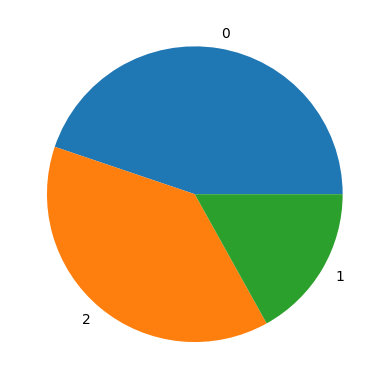

In [48]:
excel_result = pandas.read_excel(path_result, sheet_name='tag13_comparison_v1')

print(excel_result.value_counts('similar tag13 values'))

df = excel_result.value_counts('similar tag13 values',normalize=True).mul(100).reset_index().rename(columns={'index': 'value', 0: 'proportion'})
print(df)

plt.pie(df["proportion"], labels=df["similar tag13 values"]) 
plt.show()



# exact match (value 2):   38.272727 %
# not matching (value 1):  16.922078 %
# both NaN (value 0):      44.805195 %